Here, I will analyze the languages worked with, langauges want to work with, and languages admired

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('/Users/emilysanchez/Desktop/capstone_project/LangWorkWith.csv')
df.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,C#,C#,C#,Firebase Realtime Database,Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,Google Cloud
2,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL;Redis,MongoDB;MySQL;PostgreSQL;Redis,MongoDB;MySQL;PostgreSQL;Redis,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...
3,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Google Cloud,Google Cloud
4,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Power...,C#;HTML/CSS;JavaScript;PowerShell;Rust;SQL;Typ...,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript,Microsoft Access;Microsoft SQL Server;PostgreS...,Microsoft SQL Server;PostgreSQL;SQLite,Microsoft SQL Server;PostgreSQL;SQLite,Cloudflare,Cloudflare,Cloudflare


In [4]:
print(df.columns)

Index(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired'],
      dtype='object')


Saving this code as notes: this could have worked had the lists all been the same length. Instead, I will work one column at a time.
cols_to_explode = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 
                   'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
                   'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired']
for col in cols_to_explode:
    df[col] = df[col].str.split(';')

df = df.explode(cols_to_explode, ignore_index=True)

df.head()

In [5]:
#splitting LangHWW to analyze by count
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
# Explode the lists into separate rows
df_exploded = df.explode('LanguageHaveWorkedWith')
df_exploded = df_exploded.reset_index(drop=True)
df_exploded.head()


,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells),Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,Go,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
2,HTML/CSS,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
3,Java,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
4,JavaScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify


In [6]:
df_exploded.describe()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
count,116557,116557,116557,116557,116557,116557,116557,116557,116557
unique,49,9778,6191,5635,5453,3142,3809,3398,2091
top,JavaScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;TypeScript,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS)
freq,14943,1319,1643,4313,6433,10317,11693,12214,17510


In [7]:
#now, I need to count of each unique language. I will make a new df to make this analysis.

lhww_df = df_exploded['LanguageHaveWorkedWith'].value_counts().reset_index()
lhww_df.columns = ['Language', 'Count']
lhww_df.head(10)

,Language,Count
0,JavaScript,14943
1,SQL,12602
2,HTML/CSS,12410
3,TypeScript,10709
4,Python,9590
5,Bash/Shell (all shells),7244
6,C#,6340
7,Java,5982
8,PHP,4644
9,PowerShell,3438


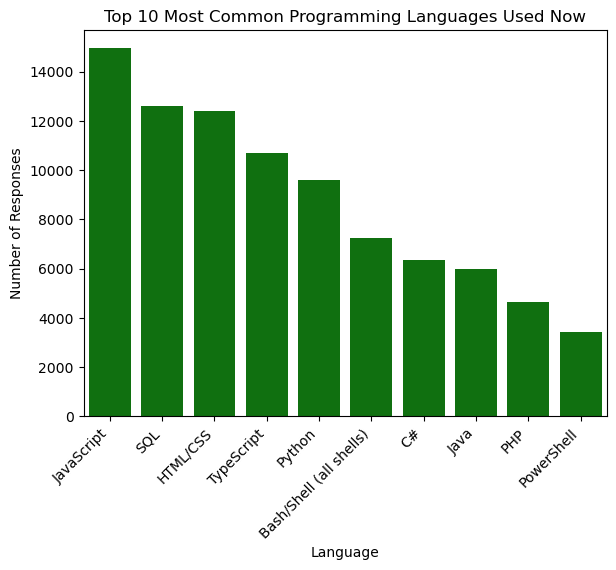

In [9]:
lhww_df = lhww_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Language', y='Count', data=lhww_df, color = 'green')
plt.title('Top 10 Most Common Programming Languages Used Now')
plt.xlabel('Language')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
#Now I will do this to every other column type. Next up is Languages people want to work with. 
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')
df_exploded1 = df.explode('LanguageWantToWorkWith')
df_exploded1 = df_exploded1.reset_index(drop=True)
df_exploded1.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",Bash/Shell (all shells),Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",Go,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
2,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",HTML/CSS,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
3,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",Java,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
4,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",JavaScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify


In [11]:
df_exploded1.describe() #for my own information

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
count,106356,106356,106356,106356,106356,106356,106356,106356,106356
unique,9343,49,6191,5635,5453,3142,3809,3398,2091
top,"[C#, HTML/CSS, JavaScript, SQL, TypeScript]",JavaScript,HTML/CSS;JavaScript;TypeScript,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS)
freq,1198,11541,1689,4258,5318,9157,11438,10848,16298


In [12]:
lwww_df = df_exploded1['LanguageWantToWorkWith'].value_counts().reset_index()
lwww_df.columns = ['Language', 'Count']
lwww_df.head(10)

,Language,Count
0,JavaScript,11541
1,SQL,10944
2,TypeScript,10437
3,HTML/CSS,10016
4,Python,8919
5,Go,5661
6,Rust,5597
7,C#,5590
8,Bash/Shell (all shells),5582
9,Java,4048


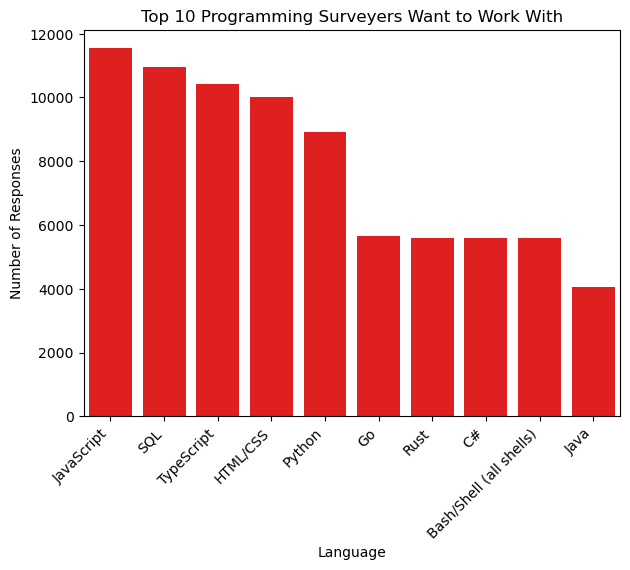

In [13]:
lwww_df = lwww_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Language', y='Count', data=lwww_df, color = 'red')
plt.title('Top 10 Programming Surveyers Want to Work With')
plt.xlabel('Language')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')
df_exploded2 = df.explode('LanguageAdmired')
df_exploded2 = df_exploded2.reset_index(drop=True)
df_exploded2.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",Bash/Shell (all shells),Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",Go,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
2,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",HTML/CSS,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
3,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",Java,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
4,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",JavaScript,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify


In [60]:
lad_df = df_exploded2['LanguageAdmired'].value_counts().reset_index()
lad_df.columns = ['Language', 'Count']
lad_df.head(10)

,Language,Count
0,JavaScript,11261
1,SQL,10670
2,HTML/CSS,9901
3,TypeScript,9170
4,Python,7576
5,Bash/Shell (all shells),5386
6,C#,5006
7,Java,3575
8,PHP,2582
9,Go,2570


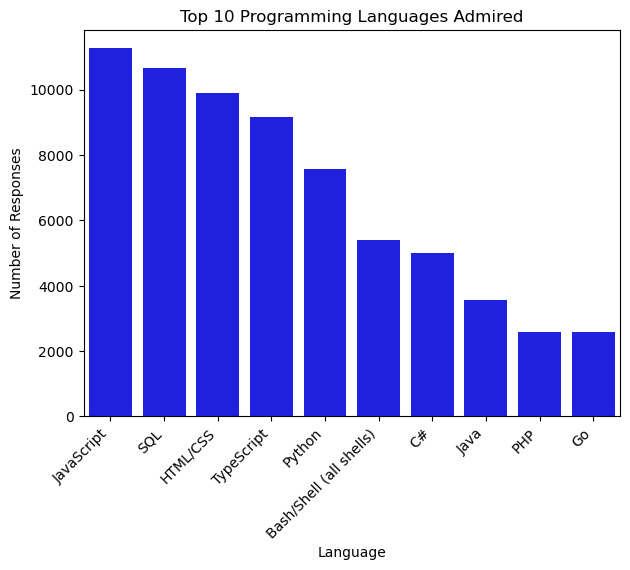

In [61]:
lad_df = lad_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Language', y='Count', data=lad_df, color = 'blue')
plt.title('Top 10 Programming Languages Admired')
plt.xlabel('Language')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
#Now we are working with database preferences

df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].str.split(';')
df_exploded3 = df.explode('DatabaseHaveWorkedWith')
df_exploded3 = df_exploded3.reset_index(drop=True)
df_exploded3.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,MongoDB,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
2,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
3,C#,C#,C#,Firebase Realtime Database,Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,Google Cloud
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,MongoDB,MongoDB;MySQL;PostgreSQL;Redis,MongoDB;MySQL;PostgreSQL;Redis,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...


In [6]:
dbhww_df = df_exploded3['DatabaseHaveWorkedWith'].value_counts().reset_index()
dbhww_df.columns = ['Database', 'Count']
dbhww_df.head(10)

,Database,Count
0,PostgreSQL,11514
1,MySQL,8556
2,SQLite,7021
3,MongoDB,5930
4,Microsoft SQL Server,5870
5,Redis,5814
6,MariaDB,3994
7,Elasticsearch,3491
8,Dynamodb,2268
9,Oracle,1907


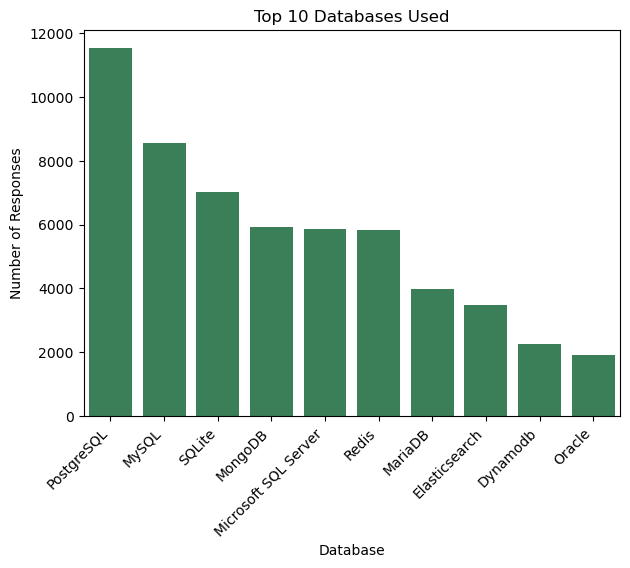

In [8]:
dbhww_df = dbhww_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Database', y='Count', data=dbhww_df, color = 'seagreen')
plt.title('Top 10 Databases Used')
plt.xlabel('Database')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded4 = df.explode('DatabaseWantToWorkWith')
df_exploded4 = df_exploded4.reset_index(drop=True)
df_exploded4.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,C#,C#,C#,[Firebase Realtime Database],Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,Google Cloud
2,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]",MongoDB,MongoDB;MySQL;PostgreSQL;Redis,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...
3,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]",MySQL,MongoDB;MySQL;PostgreSQL;Redis,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]",PostgreSQL,MongoDB;MySQL;PostgreSQL;Redis,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...


In [22]:
dbwww_df = df_exploded4['DatabaseWantToWorkWith'].value_counts().reset_index()
dbwww_df.columns = ['Database', 'Count']
dbwww_df.head(10)

,Database,Count
0,PostgreSQL,12193
1,Redis,6384
2,SQLite,6295
3,MySQL,6204
4,MongoDB,5618
5,Microsoft SQL Server,4345
6,Elasticsearch,3665
7,MariaDB,3078
8,Dynamodb,2154
9,Supabase,1623


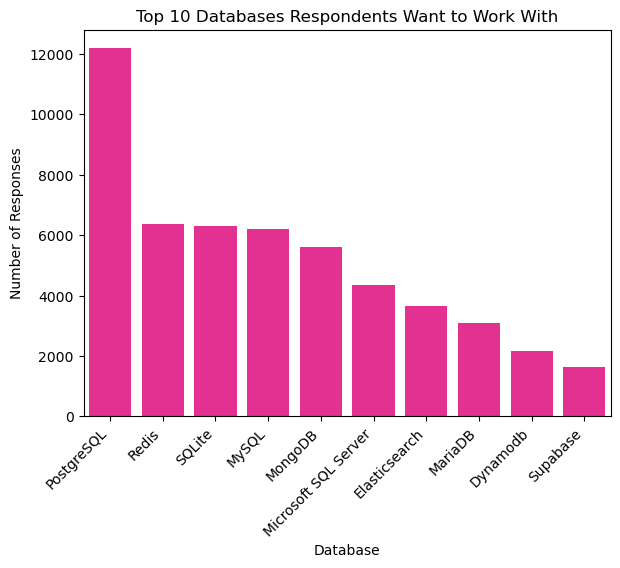

In [23]:
dbwww_df = dbwww_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Database', y='Count', data=dbwww_df, color = 'deeppink')
plt.title('Top 10 Databases Respondents Want to Work With')
plt.xlabel('Database')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
df['DatabaseAdmired'] = df['DatabaseAdmired'].str.split(';')
df_exploded5 = df.explode('DatabaseAdmired')
df_exploded5 = df_exploded5.reset_index(drop=True)
df_exploded5.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,C#,C#,C#,[Firebase Realtime Database],[Firebase Realtime Database],Firebase Realtime Database,Google Cloud,Google Cloud,Google Cloud
2,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]",MongoDB,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...
3,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]",MySQL,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]",PostgreSQL,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...


In [14]:
dbadmired_df = df_exploded5['DatabaseAdmired'].value_counts().reset_index()
dbadmired_df.columns = ['Database', 'Count']
dbadmired_df.head(10)

,Database,Count
0,PostgreSQL,10519
1,MySQL,5862
2,SQLite,5330
3,Redis,4726
4,MongoDB,4289
5,Microsoft SQL Server,4157
6,MariaDB,2739
7,Elasticsearch,2185
8,Dynamodb,1477
9,Cloud Firestore,923


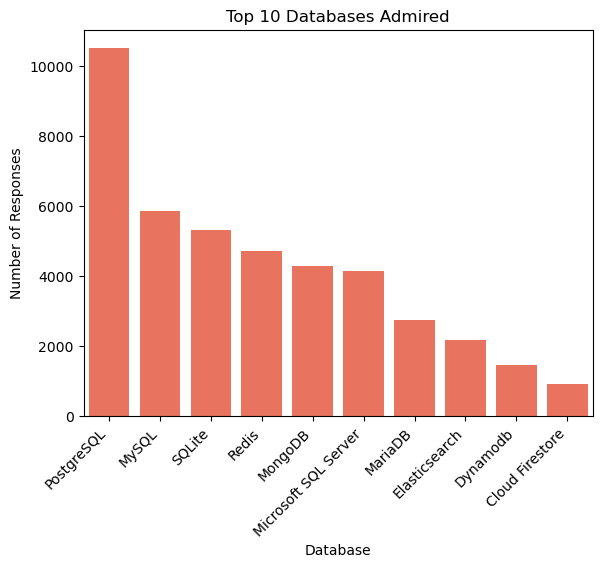

In [15]:
dbadmired_df = dbadmired_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Database', y='Count', data=dbadmired_df, color = 'tomato')
plt.title('Top 10 Databases Admired')
plt.xlabel('Database')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].str.split(';')
df_exploded6 = df.explode('PlatformHaveWorkedWith')
df_exploded6 = df_exploded6.reset_index(drop=True)
df_exploded6.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],Amazon Web Services (AWS),Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],Heroku,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
2,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify
3,C#,C#,C#,[Firebase Realtime Database],[Firebase Realtime Database],[Firebase Realtime Database],Google Cloud,Google Cloud,Google Cloud
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]",Amazon Web Services (AWS),Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...


In [19]:
platformww_df = df_exploded6['PlatformHaveWorkedWith'].value_counts().reset_index()
platformww_df.columns = ['Platform', 'Count']
platformww_df.head(10)

,Platform,Count
0,Amazon Web Services (AWS),10871
1,Microsoft Azure,6681
2,Google Cloud,5537
3,Cloudflare,3874
4,Digital Ocean,3170
5,Firebase,3025
6,Vercel,2875
7,Heroku,2002
8,Netlify,1662
9,Hetzner,1392


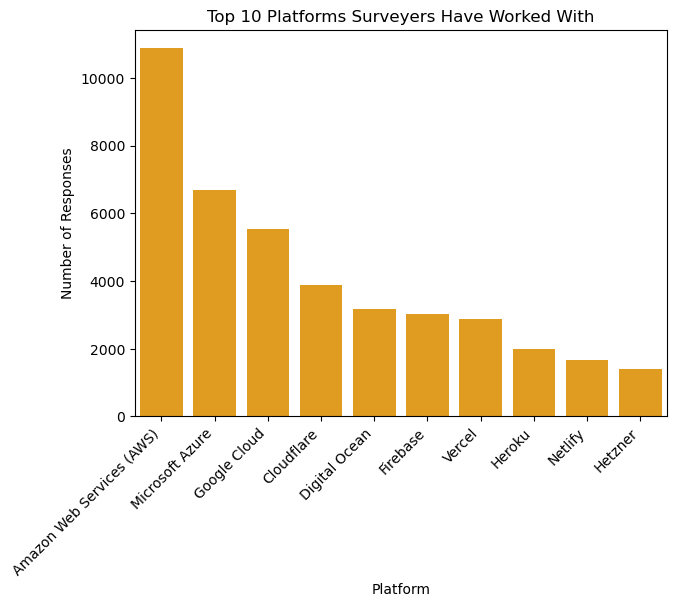

In [22]:
platformww_df = platformww_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Platform', y='Count', data=platformww_df, color = 'orange')
plt.title('Top 10 Platforms Surveyers Have Worked With')
plt.xlabel('Platform')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
df['PlatformWantToWorkWith'] = df['PlatformWantToWorkWith'].str.split(';')
df_exploded7 = df.explode('PlatformWantToWorkWith')
df_exploded7 = df_exploded7.reset_index(drop=True)
df_exploded7.head()


,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],"[Amazon Web Services (AWS), Heroku, Netlify]",Amazon Web Services (AWS),Amazon Web Services (AWS);Heroku;Netlify
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],"[Amazon Web Services (AWS), Heroku, Netlify]",Heroku,Amazon Web Services (AWS);Heroku;Netlify
2,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],"[Amazon Web Services (AWS), Heroku, Netlify]",Netlify,Amazon Web Services (AWS);Heroku;Netlify
3,C#,C#,C#,[Firebase Realtime Database],[Firebase Realtime Database],[Firebase Realtime Database],[Google Cloud],Google Cloud,Google Cloud
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]","[Amazon Web Services (AWS), Digital Ocean, Fir...",Amazon Web Services (AWS),Amazon Web Services (AWS);Digital Ocean;Fireba...


In [24]:
platformwant_df = df_exploded7['PlatformWantToWorkWith'].value_counts().reset_index()
platformwant_df.columns = ['Platform', 'Count']
platformwant_df.head(10)

,Platform,Count
0,Amazon Web Services (AWS),10516
1,Microsoft Azure,6380
2,Google Cloud,5431
3,Cloudflare,4219
4,Digital Ocean,2908
5,Vercel,2776
6,Firebase,2720
7,Hetzner,1577
8,Supabase,1368
9,Netlify,1267


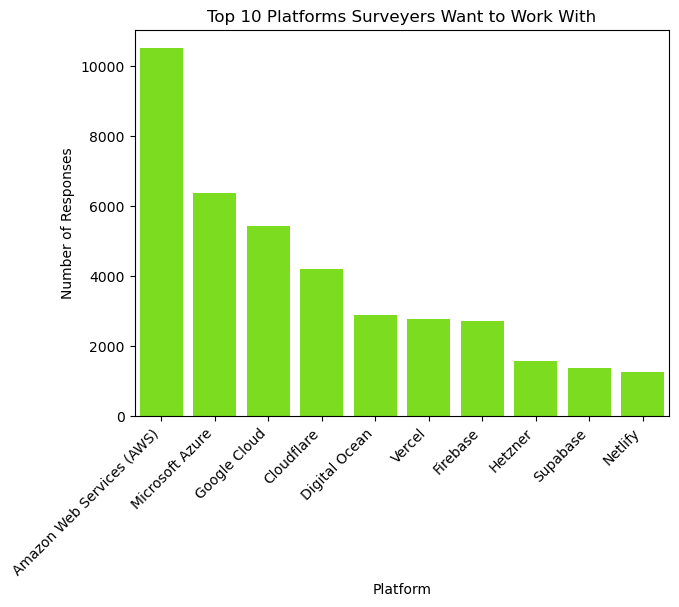

In [25]:
platformwant_df = platformwant_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Platform', y='Count', data=platformwant_df, color = 'lawngreen')
plt.title('Top 10 Platforms Surveyers Want to Work With')
plt.xlabel('Platform')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
df['PlatformAdmired'] = df['PlatformAdmired'].str.split(';')
df_exploded8 = df.explode('PlatformAdmired')
df_exploded8 = df_exploded8.reset_index(drop=True)
df_exploded8.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired
0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],"[Amazon Web Services (AWS), Heroku, Netlify]","[Amazon Web Services (AWS), Heroku, Netlify]",Amazon Web Services (AWS)
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],"[Amazon Web Services (AWS), Heroku, Netlify]","[Amazon Web Services (AWS), Heroku, Netlify]",Heroku
2,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"[Dynamodb, MongoDB, PostgreSQL]",[PostgreSQL],[PostgreSQL],"[Amazon Web Services (AWS), Heroku, Netlify]","[Amazon Web Services (AWS), Heroku, Netlify]",Netlify
3,C#,C#,C#,[Firebase Realtime Database],[Firebase Realtime Database],[Firebase Realtime Database],[Google Cloud],[Google Cloud],Google Cloud
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]","[MongoDB, MySQL, PostgreSQL, Redis]","[Amazon Web Services (AWS), Digital Ocean, Fir...","[Amazon Web Services (AWS), Digital Ocean, Fir...",Amazon Web Services (AWS)


In [28]:
platformadmired_df = df_exploded8['PlatformAdmired'].value_counts().reset_index()
platformadmired_df.columns = ['Platform', 'Count']
platformadmired_df.head(10)

,Platform,Count
0,Amazon Web Services (AWS),8890
1,Microsoft Azure,5293
2,Google Cloud,3931
3,Cloudflare,3208
4,Digital Ocean,2219
5,Firebase,2090
6,Vercel,2068
7,Hetzner,1199
8,Netlify,1005
9,Supabase,766


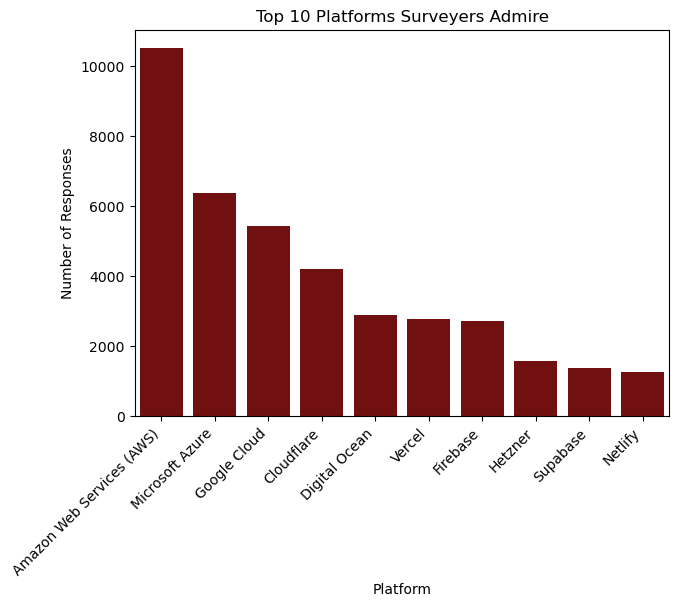

In [29]:
platformadmired_df = platformadmired_df.sort_values('Count', ascending=False).head(10)

sns.barplot(x='Platform', y='Count', data=platformwant_df, color = 'maroon')
plt.title('Top 10 Platforms Surveyers Admire')
plt.xlabel('Platform')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()